# Hello Everyone!
this is my first time writing a Kaggle notebook discussing about how I analyze this dataset. 

So first of all, let's load the datasets and take a look at the training data.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='white',context='notebook',palette='muted')
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

# Take a look at out data 

Before we begin selecting features and building our model, we may want to take a look at our data and check if we have any missing values. Also, it is a wise diecision to visualize different parameters, especially getting a sense of their distributions and other characteristics. So let's begin!

In [3]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


The above shows that in train data, there are 891 rows of passenger information, and in the test data, there are 418 rows of passenger information. Also comparing to the test data, the train data contains one more column of information, which is whether the passenger survived or not. 

In [5]:
full_data =train_data.append(test_data, ignore_index=True)
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [6]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


So we can see that among all data, there are missing values in **Age**, **Fare**, **Cabin**, and **Embarked** categories. In fact for **Cabin** category, there are only 295 rows containing information out of the 1309 total rows. These should be something we keep in mind while doing our analysis. 

# Visualization of Data



**1. Univariate Analysis for Survived Parameter:**

The category that we are interested in this dataset is 'Survived'. Thus we may want to first visualize what is the distribution of this column. Because "Survived" is a categorical variable and is consisted of 0 and 1. I used a seaborn countplot to visualize it. Count plots show the counts of observations in each categorical bin using bars and can be essentially treated as a histogram for a categorical variable. 

From the graph, it is clearly that there were more people who died than people who survived, which follows our intuition that the titanic disaster caused many people to die. We can further get the exact number of survivals and deaths using .value_counts()

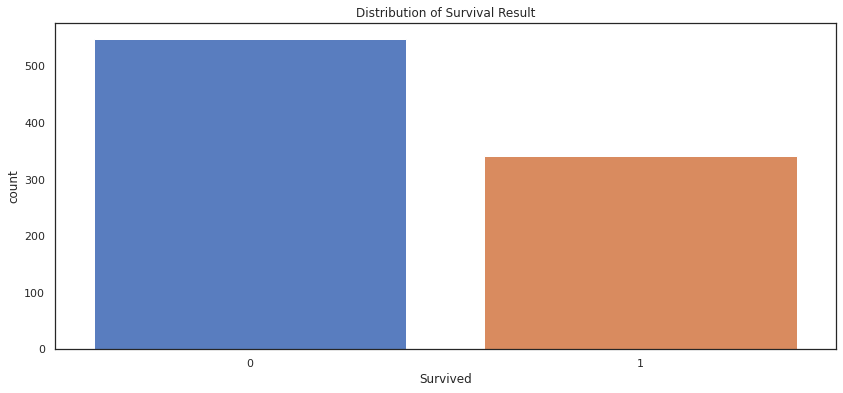

0    549
1    342
Name: Survived, dtype: int64

In [7]:
plt.figure(figsize=(14, 6))
plt.title("Distribution of Survival Result")
sns.countplot(x=train_data['Survived'])
plt.show()

train_data['Survived'].value_counts()

**2. Univariate Analysis for Other Parameters**

Now we have taked a look at Survived category. Let's visualize other columns in the training data. In the titanic dataset, there are nine other variables besides Survived. They are:
* pclass: the Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)

* sex:	             Sex of the passenger

* Age:	             Age in years of the passenger (Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5)

* sibsp:	         # of siblings / spouses the passenger had that were also aboard the Titanic (Sibling = brother, sister, stepbrother, stepsister, Spouse = husband, wife)

* parch:             # of parents / children the passenger had that were also aboard the Titanic (Parent = mother, father, Child = daughter, son, stepdaughter, stepson, Some children travelled only with a nanny, therefore parch=0 for them.)

* ticket:            Ticket number	

* fare:              Passenger fare	

* cabin:             Cabin number	

* embarked:          Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Now we may want to plot graphs to visualize these variables too. (Since ticket number and cabin number are not suitable for analysis we will not visualize them)

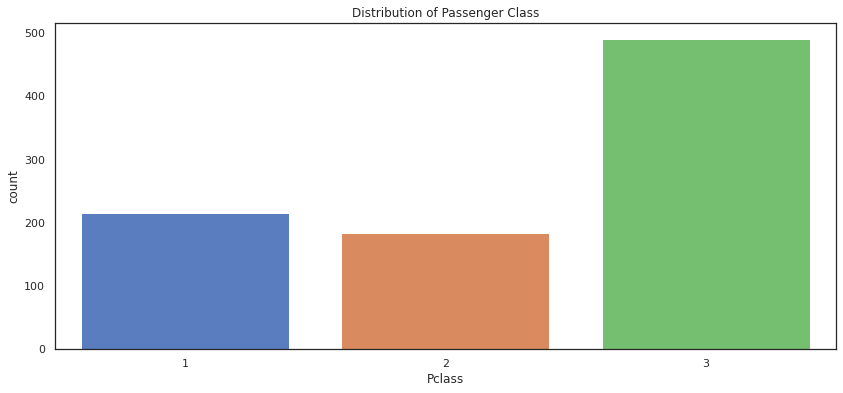

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
# Pclass
plt.figure(figsize=(14, 6))
plt.title("Distribution of Passenger Class")
sns.countplot(x=train_data['Pclass'])
plt.show()

train_data['Pclass'].value_counts()

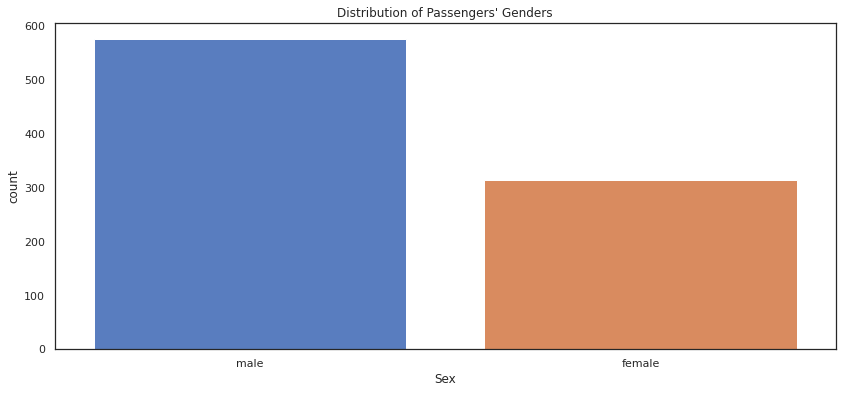

male      577
female    314
Name: Sex, dtype: int64

In [9]:
# Sex
plt.figure(figsize=(14, 6))
plt.title("Distribution of Passengers' Genders")
sns.countplot(x=train_data['Sex'])
plt.show()

train_data['Sex'].value_counts()

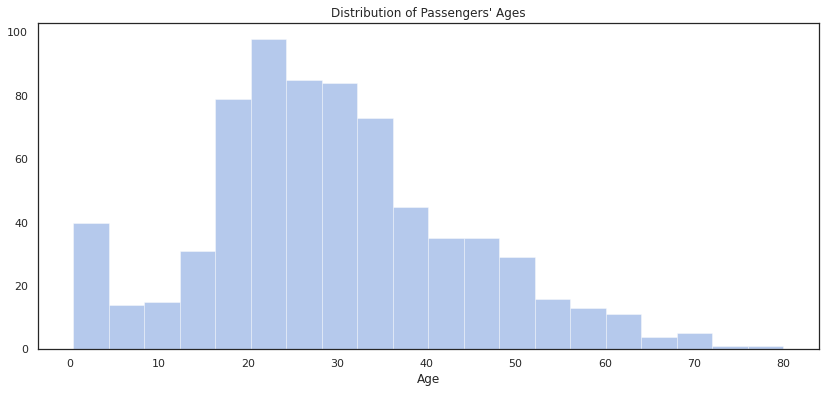

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
# Age
plt.figure(figsize=(14, 6))
plt.title("Distribution of Passengers' Ages")
sns.distplot(a=train_data['Age'], kde=False)
plt.show()

train_data['Age'].describe()

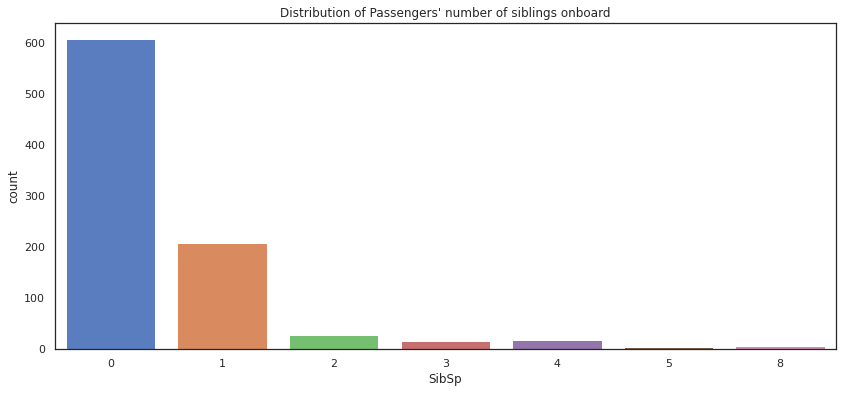

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [11]:
# sibsp

plt.figure(figsize=(14, 6))
plt.title("Distribution of Passengers' number of siblings onboard")
sns.countplot(x=train_data['SibSp'])
plt.show()

train_data['SibSp'].value_counts()

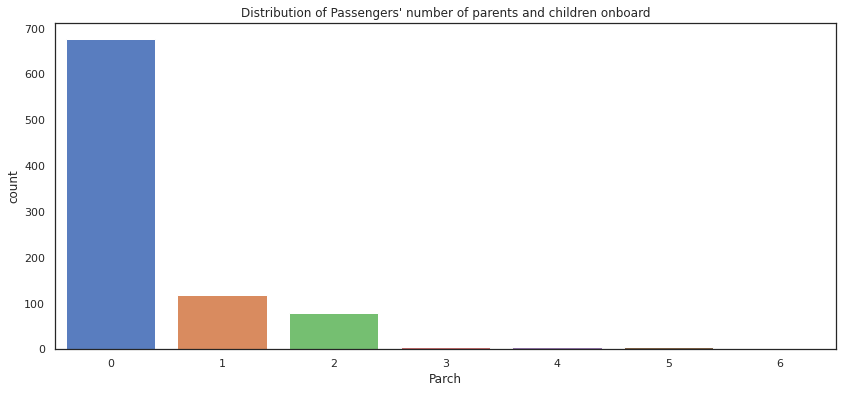

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [12]:
# parch
plt.figure(figsize=(14, 6))
plt.title("Distribution of Passengers' number of parents and children onboard")
sns.countplot(x=train_data['Parch'])
plt.show()

train_data['Parch'].value_counts()

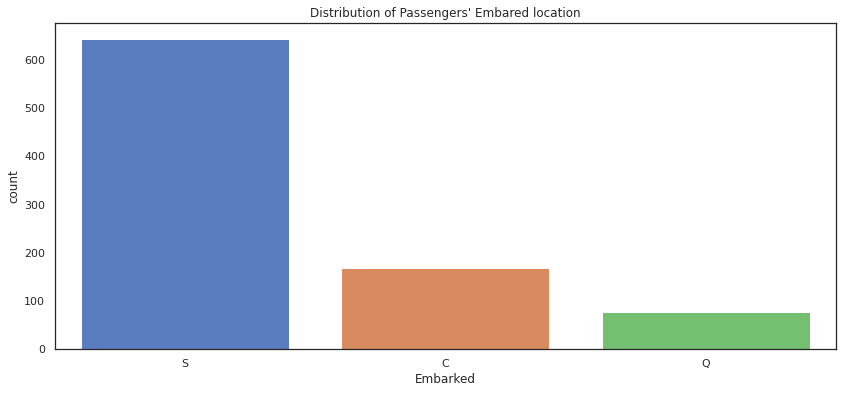

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
# Embark
plt.figure(figsize=(14, 6))
plt.title("Distribution of Passengers' Embared location")
sns.countplot(x=train_data['Embarked'])
plt.show()

train_data['Embarked'].value_counts()

We have just visualized most of the columns in training data, and in fact we can now already make some easy observations for each category:
* Passenger Class: Most of the passengers resided in the third class; only some are in the first two classes
* Sex:             There are more male passengers than there are female passengers
* Age:             The distribution seem to be slightly right-skewed and with a median at 28. There are kids who are not even 1 year old and elders who are 80 years old.
* SibSp:           Most passengers have no siblings with them, and the number of siblings decreases exponentially
* Parch:           Most passengers have no parents or children with them, and the number of siblings decreases exponentially.
* Embarked:        Most passengers embarked from Southampton, then Cherbourg; Queenstown has the least number of passengers.

# Correlations Between Parameters

We have just visualized most columns of our data. Now we may want to find associations between variables to help us understand the data and find useful features to build our model. From univariate graphs we see that there seem to be strong associations between certain variables (for example, Parch and SibSp seems to correlate strongly) So let's examine the correlations between all these parameters. This can be achievd
through two ways: **Bivariate Analysis** and a **heat map about correlations**.

So let's first begin by drawing some bivariate graphs that compare different variables

1. Pclass

The first Bivariate graph we will plot is Passenger Class vs. Survived. Since Pclass is a categorical variable, we will use a bar graph to visualize the association between the two variables. From this graph, we can conclude that class level indeed has an impact on passenger's chance to survive. The average chance of survival decreases as the class level decreases. 

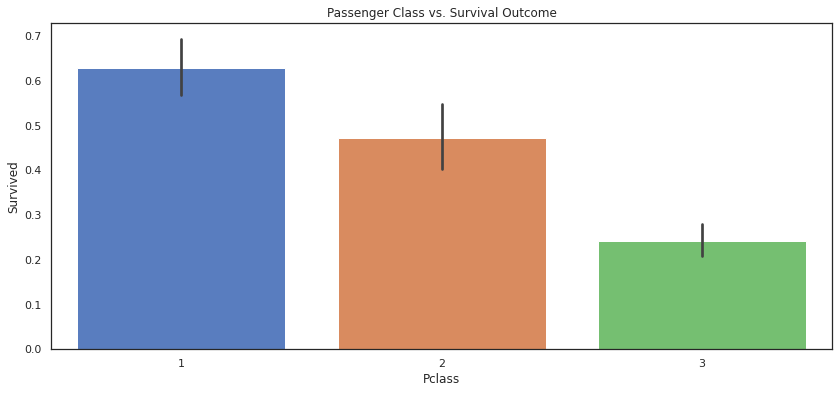

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [14]:
# Pclass

plt.figure(figsize=(14, 6))
plt.title("Passenger Class vs. Survival Outcome")
sns.barplot(x=train_data['Pclass'], y=train_data['Survived'])
plt.show()

print( train_data[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean() )

2. Sex

This graph shows that there is a very strong association between passenger's chance of survival and passenger's gender. In fact, the average chance of survival for female passengers is 74.2% and only 18.9% for male passengers! This may also explain why if we just predict all female passengers survived will give us a not bad prediction score. Anyway, we can conclude that gender is definitely an important feature when predicting whether a passenger will survive. 

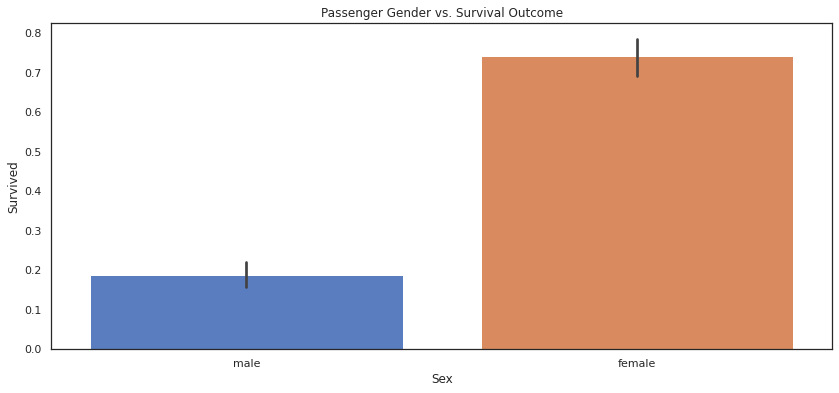

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [15]:
# Sex

plt.figure(figsize=(14, 6))
plt.title("Passenger Gender vs. Survival Outcome")
sns.barplot(x=train_data['Sex'], y=train_data['Survived'])
plt.show()

print( train_data[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean() )

3. Age

For this variable, I made two curves to show the distribution of age of passengers who survived and who did not. The two graphs seem to be pretty similar to each other. One thing I notice that is particularly interesting is that more kids below age of 10 seemed to have survived from titanic, as the brown curve is higher when age is below 10. This is also something we want to keep in mind.

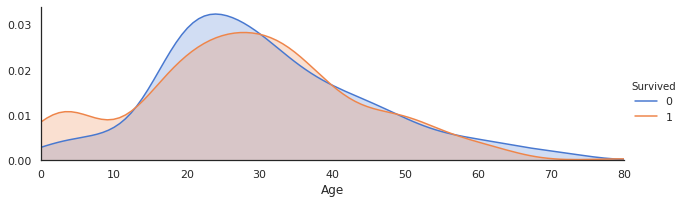

In [16]:
# Age

ageFacet=sns.FacetGrid(train_data,hue='Survived',aspect=3)

ageFacet.map(sns.kdeplot,'Age',shade=True)

ageFacet.set(xlim=(0,train_data['Age'].max()))
ageFacet.add_legend()

4. Parch

For this variable, this is not really a clear trend. However, it can be argued that when the passenger has an average parent/children group size (e.g 1, 2, and 3), the survival rate seems to be slighly higher than if the passenger has other group sizes. 

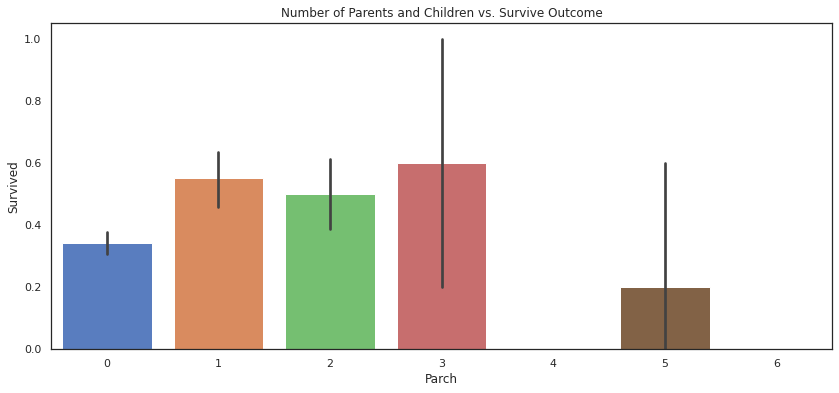

Survival rate if having 0 relatives:  0.34365781710914456
Survival rate if having 1 relatives:  0.5508474576271186
Survival rate if having 2 relatives:  0.5
Survival rate if having 5 relatives:  0.2
Survival rate if having 3 relatives:  0.6
No info for 4 relatives
No info for 6 relatives


In [17]:
# Parch

plt.figure(figsize=(14, 6))
plt.title("Number of Parents and Children vs. Survive Outcome")
sns.barplot(x=train_data['Parch'], y=train_data['Survived'])
plt.show()

for num in train_data['Parch'].dropna().unique():
    if (num == 4) or (num == 6):
        print(f"No info for {num} relatives")
    else:
        print(f"Survival rate if having {num} relatives: ", train_data['Survived'][train_data['Parch']==num].value_counts(normalize=True)[1])

5. SibSp

Again, this graph may show that if the passenger has an average sibling/spouse group size, the survival rate may be slightly higher.

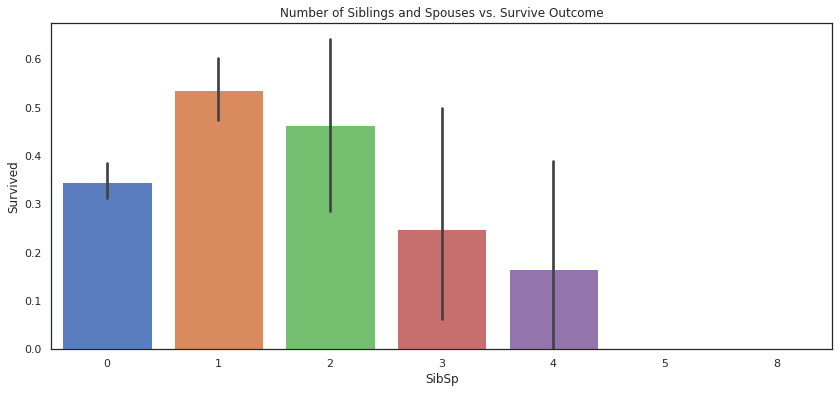

Survival rate if having 1 relatives:  0.5358851674641149
Survival rate if having 0 relatives:  0.34539473684210525
Survival rate if having 3 relatives:  0.25
Survival rate if having 4 relatives:  0.16666666666666666
Survival rate if having 2 relatives:  0.4642857142857143
No info for 5 siblings and spouses
No info for 8 siblings and spouses


In [18]:
# SibSp

plt.figure(figsize=(14, 6))
plt.title("Number of Siblings and Spouses vs. Survive Outcome")
sns.barplot(x=train_data['SibSp'], y=train_data['Survived'])
plt.show()

for num in train_data['SibSp'].dropna().unique():
    if (num == 5) or (num == 8):
        print(f"No info for {num} siblings and spouses")
    else:
        print(f"Survival rate if having {num} relatives: ", train_data['Survived'][train_data['SibSp']==num].value_counts(normalize=True)[1])

6. Embarked

This graph shows that passengers who embarked from Cherbourg seem to have a sligherly higher chance to survive. 

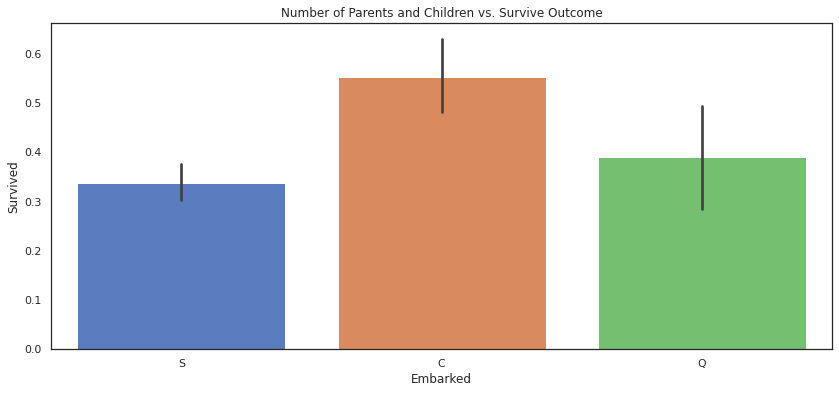

Survival rate if embarked from S:  0.33695652173913043
Survival rate if embarked from C:  0.5535714285714286
Survival rate if embarked from Q:  0.38961038961038963


In [19]:
# Embarked

plt.figure(figsize=(14, 6))
plt.title("Number of Parents and Children vs. Survive Outcome")
sns.barplot(x=train_data['Embarked'], y=train_data['Survived'])
plt.show()

for location in train_data['Embarked'].dropna().unique():
    print(f"Survival rate if embarked from {location}: ", train_data['Survived'][train_data['Embarked']==location].value_counts(normalize=True)[1])

7. Fare

This graph shows that for passengers whose fare is below 20, the chance to survive is slightly higher. 

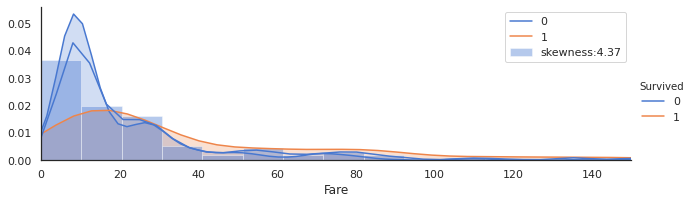

In [20]:
# Fare

ageFacet=sns.FacetGrid(train_data,hue='Survived',aspect=3)
ageFacet.map(sns.kdeplot,'Fare',shade=True)
ageFacet.set(xlim=(0,150))
ageFacet.add_legend()

farePlot=sns.distplot(full_data['Fare'][full_data['Fare'].notnull()],label='skewness:%.2f'%(full_data['Fare'].skew()))
farePlot.legend(loc='best')

Because the above graph shows that the distribution for **Fare** category is strongly right-skewed, we apply log transformation on it

In [21]:
full_data['Fare']=full_data['Fare'].map(lambda x: np.log(x) if x>0 else 0)

# Data Preprocessing

So we just visualized most of our data. The next step would be to proprocess our data in order to select features to train our model. Data Preprocessing essentially have four components: Data Cleaning, Feature Engineering, Cluster Recognition, and Feature Selection


1. Data Cleaning: Handle missing/abnormal values

So in this dataset, there are four columns that contain missing data - Age, Fare, Cabin, and Embarked. Let's first clean the missing values. 

Cabin:
We will just replace missing values in the Cabin column with "Unknown"

In [22]:
full_data['Cabin'] = full_data['Cabin'].fillna('Unkown')
full_data['Cabin'].head()

0    Unkown
1       C85
2    Unkown
3      C123
4    Unkown
Name: Cabin, dtype: object

Embarked: Since most passengers embarked from Southampton, we will just replace the two missing values in Embarked with S.

In [23]:
full_data[full_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,4.382027,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,4.382027,B28,NaN


In [24]:
full_data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [25]:
full_data['Embarked']=full_data['Embarked'].fillna('S')

Fare: We will replace this one missing value in the test data with the average of other fare values from passengers who were also in the 3rd class, from Southampton, and had an unknown cabin value

In [26]:
full_data[full_data['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [27]:
full_data['Fare'] = full_data['Fare'].fillna(full_data[(full_data['Pclass']==3)&(full_data['Embarked']=='S')&(full_data['Cabin']=='U')]['Fare'].mean()) 

2. Feature Engineering: Create new features based on existing variables to extract useful information from data

2.1 Title Column: 

Name for each passenger can indirectly reflect their status, which will also influence the likelyhood to survive from the disaster

In [28]:
full_data['Title']=full_data['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())

full_data['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Mlle              2
Major             2
Capt              1
the Countess      1
Sir               1
Dona              1
Don               1
Jonkheer          1
Mme               1
Lady              1
Name: Title, dtype: int64

In [29]:
# Group similar titles together

TitleDict={}
TitleDict['Mr']='Mr'
TitleDict['Mlle']='Miss'
TitleDict['Miss']='Miss'
TitleDict['Master']='Master'
TitleDict['Jonkheer']='Master'
TitleDict['Mme']='Mrs'
TitleDict['Ms']='Mrs'
TitleDict['Mrs']='Mrs'
TitleDict['Don']='Royalty'
TitleDict['Sir']='Royalty'
TitleDict['the Countess']='Royalty'
TitleDict['Dona']='Royalty'
TitleDict['Lady']='Royalty'
TitleDict['Capt']='Officer'
TitleDict['Col']='Officer'
TitleDict['Major']='Officer'
TitleDict['Dr']='Officer'
TitleDict['Rev']='Officer'

full_data['Title']=full_data['Title'].map(TitleDict)
full_data['Title'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      62
Officer     23
Royalty      5
Name: Title, dtype: int64

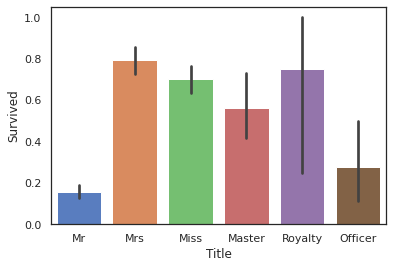

In [30]:
sns.barplot(data=full_data,x='Title',y='Survived')

Passengers with the title "Mr." shows a significantly low survival rate

2.2 Family Size:

the family size can be reflected by SibSp + Parch + 1 where the '1' refers to that particular passenger

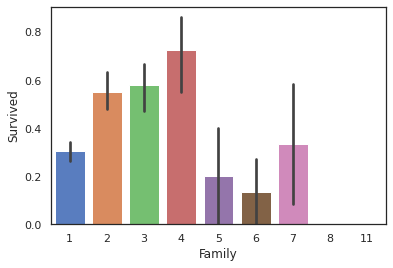

In [31]:
full_data['Family'] = full_data['SibSp'] + full_data['Parch'] + 1

sns.barplot(data=full_data,x='Family',y='Survived')

The above graph again shows that when the family size is about average (e.g 2 to 4 people), the chance to survive will be higher. So let's just classify each family into one of three categories: below 2 people, 2 to 4 people, and more than 4 people.

0    790
1    437
2     82
Name: familySize, dtype: int64

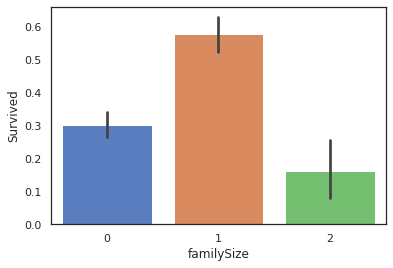

In [32]:
def familysize(familyNum):
    if familyNum == 1:
        return 0
    elif (familyNum>=2) & (familyNum<=4):
        return 1
    else:
        return 2

full_data['familySize'] = full_data['Family'].map(familysize)
sns.barplot(data=full_data,x='familySize',y='Survived')
full_data['familySize'].value_counts()

2.3 Cabin Deck:

The first letter in Cabin value for each passenger reflects the deck they stay in, and the better the deck is, the more likely the passenger will survive. So we may also want to create a new column for deck. 

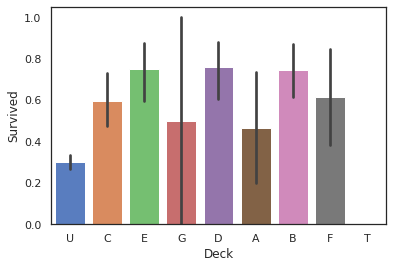

In [33]:
full_data['Deck'] = full_data['Cabin'].map(lambda x:x[0])

sns.barplot(data=full_data,x='Deck',y='Survived')

The above graph shows that if the passenger has a deck letter of E, D, or B, the chance to survive is higher. On the other hand, if the passenger has a deck letter of U, the chance is pretty low.

2.4 Ticket Group:

Passengers with the same ticket number may belong to the same group, so we can also create a new column of TickGroup to classify passengers. 

In [34]:
TickCountDict = {}
TickCountDict = full_data['Ticket'].value_counts()
TickCountDict.head()

CA. 2343    11
CA 2144      8
1601         8
3101295      7
347077       7
Name: Ticket, dtype: int64

In [35]:
full_data['TickGroup'] = full_data['Ticket'].map(TickCountDict)
full_data['TickGroup'].head()

0    1
1    2
2    1
3    2
4    1
Name: TickGroup, dtype: int64

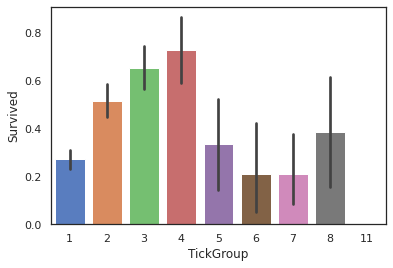

In [36]:
sns.barplot(data=full_data,x='TickGroup',y='Survived')

This shows that when the group size is about average, the chance to survive is higher, which also follows our previous conclusions. We can further applied the stragety for family size and cluster these groups again.

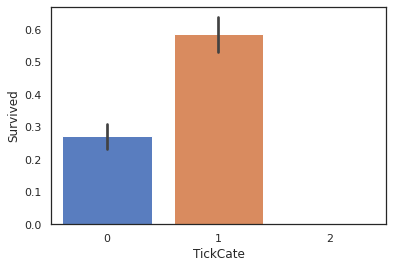

In [37]:
def TickCountGroup(num):
    if (num>=2) & (num<=4):
        return 1
    elif (num==1)|((num>=5)&(num<=8)):
        return 0
    else :
        return 2

full_data['TickCate']=full_data['TickGroup'].map(TickCountGroup)

sns.barplot(data=full_data,x='TickCate',y='Survived')

2.5 Fill missing values for Age column:

We can in fact use a regressor to predict the missing age values from other features. To do this, we will first check the correlations between Age and other parameters

In [38]:
AgePre = full_data[['Age','Parch','Pclass','SibSp','Title','familySize','TickGroup']]

AgePre = pd.get_dummies(AgePre)
ParAge = pd.get_dummies(AgePre['Parch'],prefix='Parch')
SibAge = pd.get_dummies(AgePre['SibSp'],prefix='SibSp')
PclAge = pd.get_dummies(AgePre['Pclass'],prefix='Pclass')

AgeCorrDf = pd.DataFrame()
AgeCorrDf = AgePre.corr()
AgeCorrDf['Age'].sort_values()

Pclass          -0.408106
Title_Master    -0.385380
Title_Miss      -0.282977
SibSp           -0.243699
TickGroup       -0.185284
familySize      -0.174901
Parch           -0.150917
Title_Royalty    0.057337
Title_Officer    0.166771
Title_Mr         0.183965
Title_Mrs        0.215091
Age              1.000000
Name: Age, dtype: float64

In [39]:
AgePre = pd.concat([AgePre,ParAge,SibAge,PclAge],axis=1)
AgePre.head()

,Age,Parch,Pclass,SibSp,familySize,TickGroup,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_1,Pclass_2,Pclass_3
0,22.0,0,3,1,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,38.0,0,1,1,1,2,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,26.0,0,3,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,35.0,0,1,1,1,2,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,35.0,0,3,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [40]:
Age_train = AgePre[AgePre['Age'].notnull()]
Age_test = AgePre[AgePre['Age'].isnull()]

AgeKnown_X = Age_train.drop(['Age'],axis=1)
AgeKnown_Y = Age_train['Age']

In [41]:
Age_X_test = Age_test.drop(['Age'],axis=1)

In [42]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=None,n_estimators=500,n_jobs=-1)
rfr.fit(AgeKnown_X,AgeKnown_Y)

print(rfr.score(AgeKnown_X,AgeKnown_Y))

0.5874634351980828


In [43]:
AgeUnKnown_Y = rfr.predict(Age_X_test)

full_data.loc[full_data['Age'].isnull(),['Age']] = AgeUnKnown_Y
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  Family       1309 non-null   int64  
 14  familySize   1309 non-null   int64  
 15  Deck         1309 non-null   object 
 16  TickGroup    1309 non-null   int64  
 17  TickCate     1309 non-null   int64  
dtypes: float64(3), int64(8), object(7)
memory usage:

3. Feature Selection

In this dataset the dimension of data is too high. We want to select only the features that are highly correlated with the Survived column in order to reduce the dimension of our model. 

In [44]:
fullSel = full_data.drop(['Cabin','Name','Ticket','PassengerId'],axis=1)

corrDf = pd.DataFrame()
corrDf = fullSel.corr()
corrDf['Survived'].sort_values(ascending=True)

Pclass       -0.338481
Age          -0.059277
SibSp        -0.035322
Family        0.016639
TickGroup     0.064962
Parch         0.081629
familySize    0.108631
TickCate      0.278282
Fare          0.331805
Survived      1.000000
Name: Survived, dtype: float64

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text major ticklabel objects>)

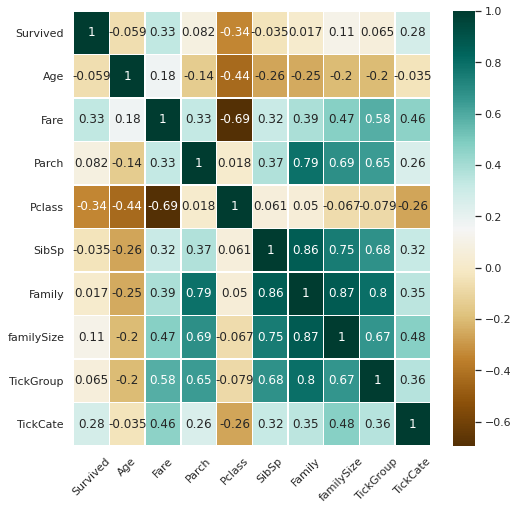

In [45]:
plt.figure(figsize=(8,8))
sns.heatmap(fullSel[['Survived','Age','Embarked','Fare','Parch','Pclass',
                    'Sex','SibSp','Title','Family','familySize','Deck',
                     'TickGroup','TickCate']].corr(),cmap='BrBG',annot=True,
           linewidths=.5)
plt.xticks(rotation=45)

In [46]:
fullSel = fullSel.drop(['Family','SibSp','TickGroup','Parch'],axis=1)

fullSel = pd.get_dummies(fullSel)
PclassDf = pd.get_dummies(full_data['Pclass'],prefix='Pclass')
TickGroupDf = pd.get_dummies(full_data['TickGroup'],prefix='TickGroup')
familySizeDf = pd.get_dummies(full_data['familySize'],prefix='familySize')

fullSel=pd.concat([fullSel,PclassDf,TickGroupDf,familySizeDf],axis=1)

In [47]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold

kfold = StratifiedKFold(n_splits=10)

experData = fullSel[fullSel['Survived'].notnull()]
preData = fullSel[fullSel['Survived'].isnull()]

experData_X = experData.drop('Survived',axis=1)
experData_y = experData['Survived']
preData_X = preData.drop('Survived',axis=1)

modelLR = LogisticRegression()
LR_param_grid = {'C' : [1,2,3],
                'penalty':['l1','l2']}
modelgsLR = GridSearchCV(modelLR,param_grid = LR_param_grid, cv=kfold, 
                                     scoring="accuracy", n_jobs= -1, verbose = 1)
modelgsLR.fit(experData_X,experData_y)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.1s finished
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 3], 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [48]:
print("Accuracy: ", modelgsLR.best_score_)

Accuracy:  0.8328089887640451


In [49]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }
modelgsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, 
                                     scoring="accuracy", n_jobs= -1, verbose = 1)
modelgsGBC.fit(experData_X,experData_y)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   49.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'loss': ['deviance'], 'max_depth': [4, 8],
                         'max_features': [0.3, 0.1],
                         'min_samples_leaf': [100, 150],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [50]:
print('Accuracy: ', modelgsGBC.best_score_)

Accuracy:  0.8384019975031209


In [51]:
GBCpreData_y=modelgsGBC.predict(preData_X)
GBCpreData_y=GBCpreData_y.astype(int)

GBCpreResultDf=pd.DataFrame()
GBCpreResultDf['PassengerId']=full_data['PassengerId'][full_data['Survived'].isnull()]
GBCpreResultDf['Survived']=GBCpreData_y
GBCpreResultDf

GBCpreResultDf.to_csv('submission.csv',index=False)